In [18]:
import torch
import torchvision
import numpy as np
import evaluate
from datasets import load_dataset
from huggingface_hub import notebook_login
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import DefaultDataCollator
from transformers import AutoImageProcessor
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
import matplotlib.pyplot as plt

In [19]:
fashion_train = load_dataset("fashion_mnist", split="train")

In [20]:
print(fashion_train)

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})


In [23]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"  # No non-breaking spaces
}


def display_random_images(dataset, num_images=4):

   num_rows = 2
   num_cols = np.ceil(num_images / num_rows).astype(int)

   plt.figure(figsize=(num_cols * 3, num_rows * 3))
   indices = np.random.choice(range(len(dataset)), size=num_images, replace=False)

   for i, idx in enumerate(indices, 1):
       idx = int(idx)
       image = dataset[idx]['image']
       label = dataset[idx]['label']
       label_name = label_names.get(label, "Unknown")

       plt.subplot(num_rows, num_cols, i)
       plt.imshow(image)
       plt.title(f"{label_name} ({label})")
       plt.axis('off')

   plt.tight_layout()
   plt.show()

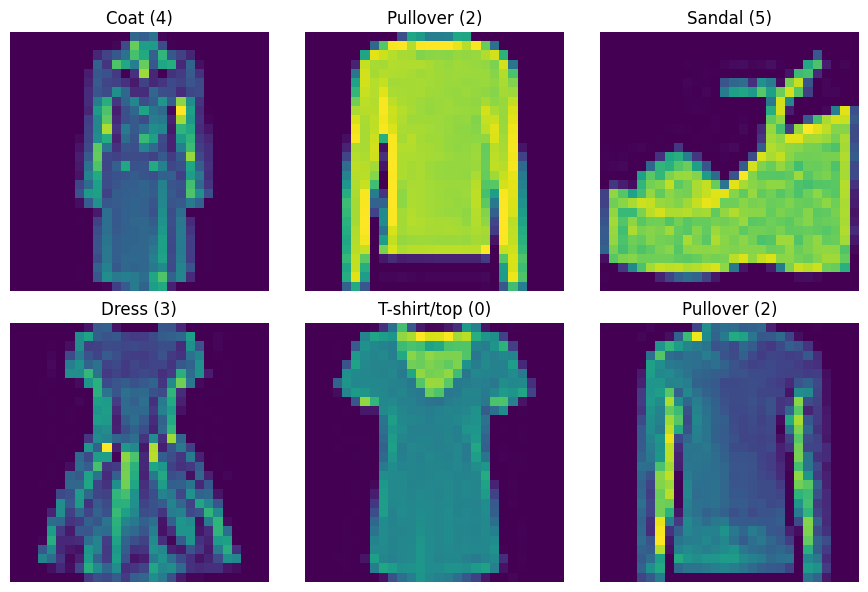

In [24]:
display_random_images(fashion_train, num_images=6)